# Computer, Meet Flowers

adapted from [this notebook](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb) by [Randal S. Olson](http://www.randalolson.com/)

## The Question 

Can a computer recognize flowers from just a few measurements of their features?

We've been given a data set from our field researchers to develop the demo, which only includes measurements for three types of Iris flowers:

  * Iris setosa
  * Iris versicolor
  * Iris virginica
  
We're trying to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width.

## Checking the data

Let's start by reading the data into a pandas DataFrame.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

iris_data = pd.read_csv('iris_data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Basic statistics on data

In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Noting that some values are missing, drop them

In [4]:
iris_data[iris_data['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [5]:
iris_data.dropna(inplace=True)
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We have roughly 1/3 of the data into each of the 3 classes.

In [6]:
iris_data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

In [7]:
iris_data['class'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [8]:
iris_data.columns

Index([u'sepal_length_cm', u'sepal_width_cm', u'petal_length_cm',
       u'petal_width_cm', u'class'],
      dtype='object')

Let's look at the distribution of the petal features:

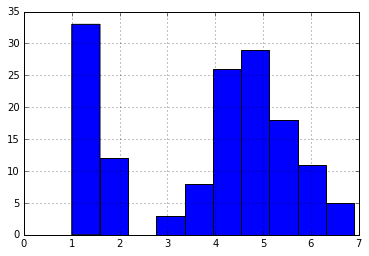

In [9]:
iris_data['petal_length_cm'].hist()

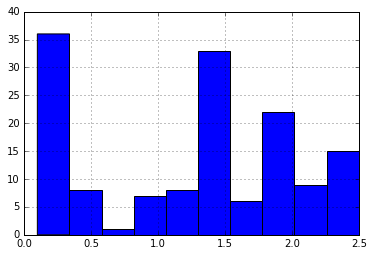

In [10]:
iris_data['petal_width_cm'].hist()

## Splitting the data

The multimodal distribution hints towards splitting the dataset according to the 3 classes.

In [11]:
setosa = iris_data[iris_data['class']=='Iris-setosa']
versicolor = iris_data[iris_data['class']=='Iris-versicolor']
virginica = iris_data[iris_data['class']=='Iris-virginica']

The mean and std tell us that data split in 3 classes is more homogeneous per class. Specially setosa is narrowly distributed around the mean for the petal variables (std close to zero -> values close to the mean)

In [12]:
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,45.000000,45.000000,45.000000,45.000000
mean,5.048889,3.431111,1.460000,0.251111
std,0.350728,0.388951,0.181409,0.110005
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


Plot histograms of the petal variables split by class. Specially Iris-setosa is easily separable from the other 2 classes by means of the petal characteristics.

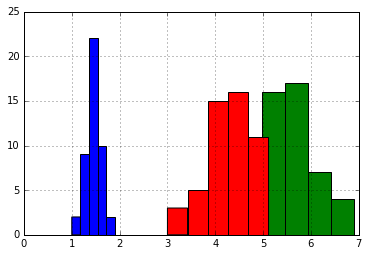

In [17]:
setosa['petal_length_cm'].hist(bins=5)
virginica['petal_length_cm'].hist(bins=5)
versicolor['petal_length_cm'].hist(bins=5)

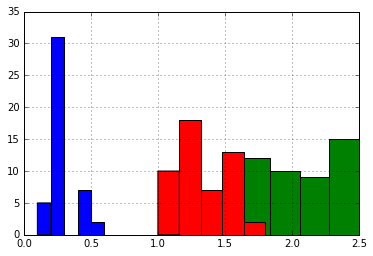

In [18]:
setosa['petal_width_cm'].hist(bins=5)
virginica['petal_width_cm'].hist(bins=5)
versicolor['petal_width_cm'].hist(bins=5)

Now we know that petal width and length are good variables that can be used to infer the class of the flowers. We can moreover observe that they are correlated (longer petals are also wider):

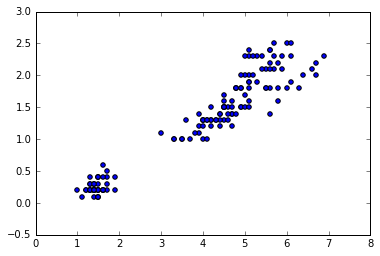

In [15]:
plt.scatter(iris_data.petal_length_cm, iris_data.petal_width_cm)

Plotting the data split in 3 classes reveals that Iris-setosa is completely separable from the other 2 classes, which can be used to train a classifier that learns the flower class based on its petal attributes.

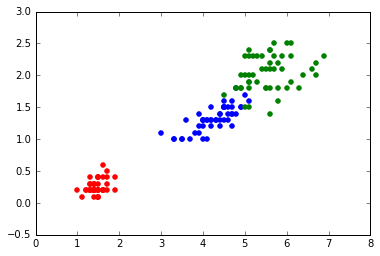

In [16]:
plt.scatter(setosa.petal_length_cm, setosa.petal_width_cm)
plt.scatter(versicolor.petal_length_cm, versicolor.petal_width_cm)
plt.scatter(virginica.petal_length_cm, virginica.petal_width_cm)